In [1]:
# Notebook configuration

ALGODIRECT_HNSW_RESULTS_DIR = "./results/algodirect/jacob/redo"
GSI_HNSW_RESULTS_DIR =  "./results/algodirect/sv7-apu11/gwilliams"
LATEST_FVS_RESULTS_DIR = "./results/fvs"

# NOTE: change this path to your local NAS1 mount path
#GT_DIR = "/Users/sabrina/mnt/nas1/fvs_benchmark_datasets" 
GT_DIR = "/home/sabrina/nas1/fvs_benchmark_datasets"

In [2]:
# Python imports

import os
import json
import re

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib widget
import ipywidgets as widgets

In [3]:
# Prechecks

if not os.path.exists(ALGODIRECT_HNSW_RESULTS_DIR):
    raise Exception("Cannot find %s.  Did you run 'rsync_from_nas.sh'?" % ALGODIRECT_HNSW_RESULTS_DIR)

if not os.path.exists(GSI_HNSW_RESULTS_DIR):
    raise Exception("Cannot find %s.  Did you run 'rsync_from_nas.sh'?" % GSI_HNSW_RESULTS_DIR)

if not os.path.exists(LATEST_FVS_RESULTS_DIR):
    raise Exception("Cannot find %s.  Did you run 'rsync_from_nas.sh'?" % LATEST_FVS_RESULTS_DIR)

if not os.path.exists(GT_DIR):
    raise Exception("Cannot find %s.  Did you mount NAS1 locally and change the config above?" % GT_DIR)

In [4]:
#
# Load the latest FVS benchmark data
#

In [4]:
# Load all the FVS benchmarks into one data frame

csvs = []

# locate a .csv files in the results data dir
for root, dir, files in os.walk(LATEST_FVS_RESULTS_DIR):
    #print(root,dir)
    for file in files:
        
        if file.endswith(".csv"):
            fpath = os.path.join(root, file)
            csvs.append(fpath)
if len(csvs)==0:
    raise Exception("No CSVs found!")
print("found %d CSV files" % len(csvs))

# load all data frames
dfs = []
for csv in csvs:
    df = pd.read_csv(csv)
    if csv.find("apu11")>=0:
        df['host']="apu11"
    elif csv.find("apu12")>=0:
        df['host']="apu12"
    else:
        raise Exception("host machine not known for" ,csv )
    dfs.append(df)

# concat into one master
print("Concatenating into one master dataframe...")
df_fvs = pd.concat( dfs )
print("There are %d rows" % df_fvs.shape[0])
df_fvs.head(10)

found 74 CSV files
Concatenating into one master dataframe...
There are 74074 rows


,type,fvs_version,allocationid,datasetid,dataset_path,queries_path,bits,ts_start,ts_train_start,ts_train_end,ts_train_walltime,ts_query_start,ts_query_end,ts_query_walltime,response,recall,host
0,train,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,/mnt/nas1/fvs_benchmark_datasets/deep-10M.npy,NaN,128.0,Thu Sep 14 21:48:22 2023,1.694753e+09,1.694754e+09,1178.232852,NaN,NaN,NaN,NaN,NaN,apu12
1,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__0.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.034183,0.028239,1.0,apu12
2,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__1.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.032082,0.026690,0.8,apu12
3,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__2.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.026284,0.021634,0.9,apu12
4,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__3.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.026364,0.022113,0.9,apu12
5,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__4.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.023939,0.019321,1.0,apu12
6,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__5.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.025702,0.021230,1.0,apu12
7,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__6.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.023537,0.018992,1.0,apu12
8,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__7.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.025308,0.020786,0.9,apu12
9,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__8.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.028385,0.023743,1.0,apu12


In [6]:
#
# Please don't change the rest of this notebook!
#

In [7]:
#
# Algo Direct - HNSW
#

In [5]:
# Accumulate algodirect results by recursively walking the results dir

csvs = []
gsi_csvs = []
latest_csvs = []

# locate a .json files in the results data dir
for root, dir, files in os.walk(ALGODIRECT_HNSW_RESULTS_DIR):
    for file in files:
        
        if file.endswith(".csv"):
            fpath = os.path.join(root, file)
            csvs.append(fpath)

for root, dir, files in os.walk(GSI_HNSW_RESULTS_DIR):
    for file in files:
        if file.endswith(".csv") and "flat" not in file:
            fpath = os.path.join(root, file)
            gsi_csvs.append(fpath)

for root, dir, files in os.walk(LATEST_FVS_RESULTS_DIR):
    for file in files:
        if file.endswith(".csv") and "flat" not in file:
            fpath = os.path.join(root, file)
            latest_csvs.append(fpath)

print(gsi_csvs[0])
print(latest_csvs[1])

./results/algodirect/sv7-apu11/gwilliams/algodirect_gemini_sv7-apu11_deep1b_clusters_1000000_512_2.965147_2.965195.csv
./results/fvs/sv7-apu12/all_09142023/qbq/benchmarks-deep50M-q1000-qbq-clusters-256-1694769120.csv


In [10]:
def size_num(s):
    '''get raw numercs of text abbrev'''
    if s == '1M': return 1000000
    elif s == '2M': return 2000000
    elif s == '5M': return 5000000
    elif s == '10M': return 10000000
    elif s == '20M': return 20000000
    elif s == '50M': return 50000000
    elif s == '100M': return 100000000
    elif s == '200M': return 200000000
    elif s == '250M': return 250000000
    elif s == '500M': return 500000000
    elif s == '10K': return 10000
    else: raise Exception("Unsupported size " + s)

# Load all latest fvs gsi apu csv results into one dataframe

latest_dfs = []

for csvfile in latest_csvs:
    # parse the file name for info
    _df = pd.read_csv(csvfile)
    dirs = os.path.normpath(csvfile).split(os.sep)
    #print(dirs)
    parts = dirs[-1].split("-")
    s = parts[1][4:]
    size = size_num(s)
    print(parts)
    if parts[2]=="work": continue
    _df['implementation']=dirs[1]
    _df['machine']=dirs[2]
    _df['dset']=parts[1]  # TODO: make sure to change for different base dataset
    # skip idx 4 because it's cluster or flat
    _df['numrecs']=size
    _df['bits']=int(parts[5])
    #_df['importtime']=float(parts[7])
    _df['walltime']=float(parts[6][:-4])
    latest_dfs.append(_df)

latest_df = pd.concat(latest_dfs)
#print(df.columns, df.shape)

['benchmarks', 'deep10M', 'q1000', 'qbq', 'clusters', '128', '1694749497.csv']
['benchmarks', 'deep50M', 'q1000', 'qbq', 'clusters', '256', '1694769120.csv']
['benchmarks', 'deep1M', 'q1000', 'qbq', 'clusters', '768', '1694741025.csv']
['benchmarks', 'deep250M', 'q1000', 'qbq', 'clusters', '256', '1694818033.csv']
['benchmarks', 'deep1M', 'q1000', 'qbq', 'clusters', '128', '1694741025.csv']
['benchmarks', 'deep5M', 'q1000', 'qbq', 'clusters', '256', '1694744468.csv']
['benchmarks', 'deep2M', 'q1000', 'qbq', 'clusters', '64', '1694742325.csv']
['benchmarks', 'deep250M', 'q1000', 'qbq', 'clusters', '128', '1694818033.csv']
['benchmarks', 'deep50M', 'q1000', 'qbq', 'clusters', '512', '1694769120.csv']
['benchmarks', 'deep20M', 'q1000', 'qbq', 'clusters', '256', '1694755759.csv']
['benchmarks', 'deep500M', 'q1000', 'qbq', 'clusters', '128', '1694908351.csv']
['benchmarks', 'deep1M', 'q1000', 'qbq', 'clusters', '256', '1694741025.csv']
['benchmarks', 'deep2M', 'q1000', 'qbq', 'clusters', '1

In [9]:
# Show the data

pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
latest_df.head()

,type,fvs_version,allocationid,datasetid,dataset_path,queries_path,bits,ts_start,ts_train_start,ts_train_end,...,ts_query_start,ts_query_end,ts_query_walltime,response,recall,implementation,machine,dset,numrecs,walltime
0,train,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,/mnt/nas1/fvs_benchmark_datasets/deep-10M.npy,NaN,128,Thu Sep 14 21:48:22 2023,1.694753e+09,1.694754e+09,...,NaN,NaN,NaN,NaN,NaN,fvs,sv7-apu12,deep10M,10000000,1.694749e+09
1,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__0.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,...,1.694755e+09,1.694755e+09,0.034183,0.028239,1.0,fvs,sv7-apu12,deep10M,10000000,1.694749e+09
2,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__1.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,...,1.694755e+09,1.694755e+09,0.032082,0.026690,0.8,fvs,sv7-apu12,deep10M,10000000,1.694749e+09
3,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__2.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,...,1.694755e+09,1.694755e+09,0.026284,0.021634,0.9,fvs,sv7-apu12,deep10M,10000000,1.694749e+09
4,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__3.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,...,1.694755e+09,1.694755e+09,0.026364,0.022113,0.9,fvs,sv7-apu12,deep10M,10000000,1.694749e+09


In [18]:
# get all unique bit sizes
bits = latest_df['bits'].unique()
bits.sort()
print("all efs=",bits)

all efs= [ 64 128 256 512 768]


In [19]:
# compute latest recall via GT file
latest_df['q_index'] = latest_df.index
print(latest_df.columns, latest_df.shape)

# get all unique dataset sizes
sizes = latest_df['numrecs'].unique()
sizes.sort()
print("all sizes=",sizes)

# get all unique bit sizes
bits = latest_df['bits'].unique()
bits.sort()
print("all efs=",bits)

# create empty ecall10 column to be computed shortly
latest_df['recall10']= None

def hsize(numrecs):
    '''get text abbrev of raw numrecs'''
    if numrecs==10000: return "10K"
    elif numrecs==1000000: return "1M"
    elif numrecs==2000000: return "2M"
    elif numrecs==5000000: return "5M"
    elif numrecs==10000000: return "10M"
    elif numrecs==20000000: return "20M"
    elif numrecs==50000000: return "50M"
    elif numrecs==100000000: return "100M"
    elif numrecs==250000000: return "250M"
    elif numrecs==500000000: return "500M"
    else: raise Exception("Unsupported size" + str(numrecs))


# accumulate summaries for new dataframe
summaries = []

for bit in bits:
    for sz in sizes:
        # get the ground truth file for this numrecs size
        hsz = hsize(sz)
        gt_file = os.path.join(GT_DIR, "deep-%s-gt-1000.npy" % hsz)
        if not os.path.exists(gt_file):
            raise Exception("Cannot find "+ gt_file)
        gt = np.load(gt_file)
        #print(gt_file, gt.shape)
    
        # get the rows for this numrecs size
        latest_df_sz = latest_df[ (latest_df['numrecs']==sz) & \
                    (latest_df['bits']==bit) ]
        if latest_df_sz.shape[0]==0:
            print("Nothing for bits=%d and numrecs=%d" % (bit, sz))
            continue
        elif latest_df_sz.shape[0]!=1000:
            print("Warning: multiple runs across query set (%d,%d)" % \
                (ef,sz))
            
        # iterate all rows and compute recall
        for i in range(latest_df_sz.shape[0]):
            # get query index
            q_i = latest_df_sz.iloc[i, list(latest_df.columns).index('q_index') ]
            # get the search indices for this query index
            inds = [ int(ith) \
                for ith in \
                    latest_df_sz.iloc[i, list(latest_df.columns).index('inds')]
                        .replace("=","-").split("-") ]
            #print(q_i)
            # get the associated ground truth indices for this query for k=10
            gt10 = gt[q_i][0:10]
            # compute intersection for recall
            isec = np.intersect1d( gt10, inds)
            recall10 = len(isec)/10.0
            # apply to this row
            latest_df_sz.at[i,'recall10'] = recall10
 
        # compute mean recall
        recall10_mean = latest_df_sz['recall10'].mean()
    
        # compute mean search time 
        search_mean = (latest_df_sz['search_time'].mean()) * 1000.0
    
        # grab the train time
        import_time = latest_df_sz['importtime'].mean()
        
        # grab the wall import time
        wall_time = latest_df_sz['walltime'].mean()
        
        #print(bt, sz, recall10_mean, search_mean, train_time, wall_time )
        summary = {'bits':bit, 'numrecs':sz, \
                   'recall10_mean': recall10_mean, \
                   'search_mean': search_mean, \
                   'import_time': import_time, \
                   'wall_time': wall_time }
        summaries.append(summary)

summary_latest_df = pd.DataFrame(summaries)
summary_latest_df = summary_latest_df[summary_latest_df['bits'] != 768]
print(summary_latest_df)

print("Done")

Index(['type', 'fvs_version', 'allocationid', 'datasetid', 'dataset_path',
       'queries_path', 'bits', 'ts_start', 'ts_train_start', 'ts_train_end',
       'ts_train_walltime', 'ts_query_start', 'ts_query_end',
       'ts_query_walltime', 'response', 'recall', 'implementation', 'machine',
       'dset', 'numrecs', 'walltime', 'q_index'],
      dtype='object') (74074, 22)
all sizes= [  1000000   2000000   5000000  10000000  20000000  50000000 100000000
 250000000 500000000]
all efs= [ 64 128 256 512 768]


ValueError: 'inds' is not in list

In [15]:
# Plot import/train times

# compute average train time via groupby
avg_import_time = \
    summary_df.groupby( [ 'numrecs' ] ) ['import_time'].mean()

# compute average wall import time via groupby
avg_wall_import_time = \
    summary_df.groupby( [ 'numrecs' ] ) ['wall_time'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_import_time.index:
    x = idx
    xs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ys.append(y)
print("hnsw train time", xs,ys)

# get the plot points for wall import time
wxs = []
wys = []
for idx in avg_wall_import_time.index:
    x = idx
    wxs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wys.append(y)
print("hnw wall import time", wxs,wys)

avg_import_time = \
    summary_gsi_df.groupby(['numrecs'])['import_time'].mean()
avg_wall_import_time = \
    summary_gsi_df.groupby(['numrecs'])['wall_time'].mean()
xgs = []
ygs = []
for idx in avg_import_time.VCFindex:
    x = idx
    xgs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ygs.append(y)
print("fvs wall import time", xgs,ygs)

wxgs = []
wygs = []
for idx in avg_wall_import_time.index:
    x = idx
    wxgs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wygs.append(y)
print("fvs wall import time", wxgs,wygs)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
#ax.plot(xs,ys, marker='x', label="import time")
ax.plot(wxs,wys, marker='x', label="Weaviate HNSW wall import time")
#ax.plot(xgs,ygs, marker='x', label="gsi import time")
ax.plot(wxgs,wygs, marker='x', label="GSI FVS wall import time")
ax.set_ylabel('hours')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
#ax.set_xticklabels(['10K','1M', '2M', '5M', '10M', '20M', '50M', '100M', '250M', '500M'], rotation = 45)
ax.set_xticklabels(['', '1M','','','', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
hnsw_hours = "%.1f" % wys[-1]
ax.annotate(hnsw_hours, xy=(wxs[-1],wys[-1]), xytext=(0.0,-30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )
gsi_hours = "%.1f" % wygs[-1]
ax.annotate(gsi_hours, xy=(wxgs[-1],wygs[-1]), xytext=(0.0,30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )

ax.set_title("Weaviate HNSW vs GSI FVS Import Time - Subsets of Deep-1B")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/weaviate_hnsw_vs_fvs_wall_import_time_ad.png")

# TODO:  plot the variance at each X

hnsw train time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0003818066666666668, 0.14540470305555553, 0.2352491308333334, 1.001331927222222, 2.179133355833333, 8.664645293055557, 19.848325099722224, 39.44160888972221, 237.5416018741666, 432.4261059541668]
hnw wall import time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.00038237222222222214, 0.1454839922222222, 0.23534187722222216, 1.0016525494444446, 2.17970271, 8.666903835555553, 19.852297736944447, 39.448619405555576, 237.57768246083327, 432.4658226855555]


AttributeError: 'Series' object has no attribute 'VCFindex'

In [16]:
def format_size(size):
    if size < 1000000:      
        return str(size)[:-3]+'K'
    elif size < 1000000000:
        return str(size)[:-6]+'M'
    else:
        return str(size)[:-9]+'B'

def unformat_size(size):
    if size[-1] == 'K':
        return int(size[:-1]) * 1000
    elif size[-1] == 'M':
        return int(size[:-1]) * 1000000
    else:
        return int(size[:-1]) * 1000000000

In [18]:
# select 1 dataset size
# colored pareto front

In [40]:
from ipywidgets import Layout, HBox
from IPython.display import clear_output

In [44]:
colors = ['red', 'blue', 'green', 'purple', 'yellow', 'pink', 'teal', 'orange', 'brown', 'gray']
def set_graph(change):
    update(change)
    global ann_list
    global lines
    global weav
    global gsi
    global p_mode

    if change['new'] == ('GSI', ):
        gsi, weav = True, False
        return
    elif change['new'] == ('Weaviate', ):
        gsi, weav = False, True
        return
    elif change['new'] == ('GSI', 'Weaviate'):
        gsi, weav = True, True
        return
    
    if type(change['new']) == bool:
        p_mode = not p_mode
        return
    
    lines = []
    ann_list = []
    if p_mode:
        for color, size in enumerate(change['new']):
            if gsi:
                tmp = summary_gsi_df[summary_gsi_df.numrecs == unformat_size(size)]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label=str(size) + ' GSI', color=colors[color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.bits):
                    ann_list.append(plt.annotate(s, (i,j)))
            if weav:
                tmp = summary_df[summary_df.numrecs == unformat_size(size)]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label=str(size) + ' Weaviate', color=colors[::-1][color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.ef):
                    ann_list.append(plt.annotate(s, (i,j)))
    else:
        for color, ef in enumerate(summary_gsi_df.bits.unique()):
            if gsi:
                tmp = summary_gsi_df[(summary_gsi_df.bits == ef) & (summary_gsi_df.numrecs.isin([unformat_size(x) for x in change['new']]))]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label = str(ef) + ' GSI', color=colors[color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
                    ann_list.append(plt.annotate(format_size(s), (i,j)))
            if weav:
                tmp = summary_df[(summary_df.ef == ef) & (summary_df.numrecs.isin([unformat_size(x) for x in change['new']]))]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label = "ef = " + str(ef), color=colors[::-1][color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
                    ann_list.append(plt.annotate(format_size(s), (i,j)))
    ax.legend()

def update(change):
    global ann_list
    global lines
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    [line.pop(0).remove() for line in lines if len(line) > 0]
    lines[:] = []
    plt.close(0)


In [45]:
sm = widgets.SelectMultiple(
    options = ['GSI', 'Weaviate'],
    layout=Layout(height='50px', width='100px')
)
sm_size = widgets.SelectMultiple(
    options=[format_size(size) for size in sizes],
    layout=Layout(width='40px', height='180px')
)
pareto = widgets.Checkbox(
    value=False,
    description='pareto mode'
)

def on_value_change(change):
    print(change['new'])
    print('change: ', change)

sm.observe(set_graph, names='value')
sm_size.observe(set_graph, names='value')
pareto.observe(set_graph, names='value')
weav, gsi, p_mode = False, False, False
fig, ax = plt.subplots(figsize=(17,10))
ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.set_title("Weaviate HNSW / Recall vs Latency / Subsets of Deep1B")
ax.legend()
HBox([sm, sm_size, pareto])


NameError: name 'format_size' is not defined

In [22]:
#
# Individual Paretto front graphs
#


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     ef    numrecs  recall10_mean  search_mean   import_time     wall_time
9    64  500000000         0.8314     8.593629  1.556734e+06  1.556877e+06
19  128  500000000         0.8983    11.130874  1.556734e+06  1.556877e+06
29  256  500000000         0.9402    47.821046  1.556734e+06  1.556877e+06
39  512  500000000         0.9656    22.098475  1.556734e+06  1.556877e+06
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
15   128  500000000         0.8685    79.771007  24141.563112  24141.563170
24   256  500000000         0.9635   113.749056    661.277671    661.277726
33   512  500000000         0.9952   158.350539  26066.118713  26066.118766
[8.593629, 11.130873999999999, 47.821045999999996, 22.098475] [0.8313999999999975, 0.8982999999999967, 0.9401999999999977, 0.9655999999999983]
[79.77100700000001, 113.749056, 158.35053900000003] [0.8684999999999959, 0.9634999999999969, 0.9951999999999992]


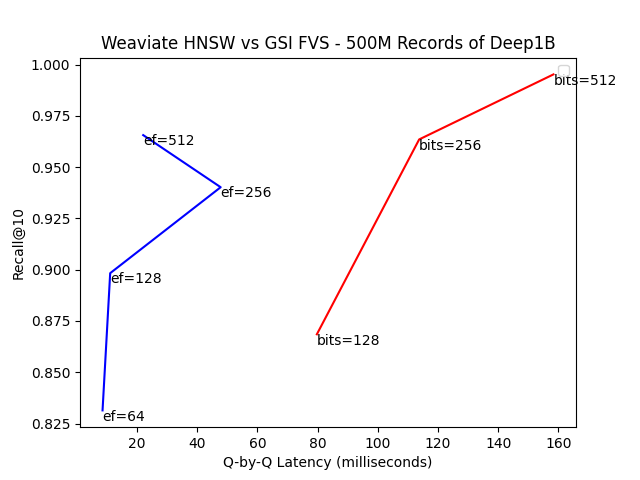

In [23]:
# 500M

# get dataframes for 500M
df_hnsw_500M = summary_df[ summary_df['numrecs']==500000000 ]
print(df_hnsw_500M)
df_gsi_500M = summary_gsi_df[ summary_gsi_df['numrecs']==500000000 ]
print(df_gsi_500M)

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_500M['ef'])
paretto_hnsw_search = list(df_hnsw_500M['search_mean'])
paretto_hnsw_recall = list(df_hnsw_500M['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)
paretto_gsi_parameters = list(df_gsi_500M['bits'])
paretto_gsi_search = list(df_gsi_500M['search_mean'])
paretto_gsi_recall = list(df_gsi_500M['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search,paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search,paretto_gsi_recall,color='red')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS - 500M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_500M.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     ef    numrecs  recall10_mean  search_mean    import_time      wall_time
8    64  250000000         0.8513     3.538584  855149.766747  855279.656859
18  128  250000000         0.9123     6.187096  855149.766747  855279.656859
28  256  250000000         0.9517    12.269014  855149.766747  855279.656859
38  512  250000000         0.9750    42.109806  855149.766747  855279.656859
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
14   128  250000000         0.8960    72.141179  13419.462200  13419.462247
23   256  250000000         0.9767    63.741886  12914.538628  12914.538675
32   512  250000000         0.9961   110.187049           NaN           NaN
[3.538584, 6.187096, 12.269014, 42.109806] [0.8512999999999974, 0.9122999999999973, 0.9516999999999978, 0.9749999999999986]
[72.141179, 63.741886, 110.1870485] [0.8959999999999958, 0.9766999999999975, 0.9960999999999995]


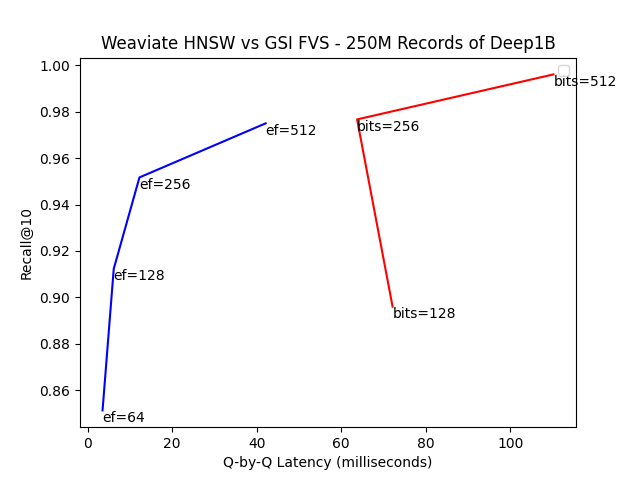

In [24]:
# 250M

# get dataframes for 250M
df_hnsw_250M = summary_df[ summary_df['numrecs']==250000000 ]
print(df_hnsw_250M )
df_gsi_250M  = summary_gsi_df[ summary_gsi_df['numrecs']==250000000 ]
print(df_gsi_250M )

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_250M ['ef'])
paretto_hnsw_search = list(df_hnsw_250M ['search_mean'])
paretto_hnsw_recall = list(df_hnsw_250M ['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)
paretto_gsi_parameters = list(df_gsi_250M ['bits'])
paretto_gsi_search = list(df_gsi_250M ['search_mean'])
paretto_gsi_recall = list(df_gsi_250M ['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search,paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search,paretto_gsi_recall,color='red')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS - 250M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_250M.png")

In [ ]:
# 100M

# get dataframes for 100M
df_hnsw_100M = summary_df[ summary_df['numrecs']==100000000 ]
print(df_hnsw_100M )
df_gsi_100M  = summary_gsi_df[ summary_gsi_df['numrecs']==100000000 ]
print(df_gsi_250M )

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_100M ['ef'])
paretto_hnsw_search = list(df_hnsw_100M ['search_mean'])
paretto_hnsw_recall = list(df_hnsw_100M ['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)
paretto_gsi_parameters = list(df_gsi_100M ['bits'])
paretto_gsi_search = list(df_gsi_100M ['search_mean'])
paretto_gsi_recall = list(df_gsi_100M ['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search,paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search,paretto_gsi_recall,color='red')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS - 100M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_100M.png")

## version 0.9.5.4

In [54]:
latest_df.bits.unique()

array([128, 256, 768,  64, 512])

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0), Output()), _dom_classes=('widget-inter…

interactive(children=(Checkbox(value=False, description='GSI_pareto'), Output()), _dom_classes=('widget-intera…

interactive(children=(Checkbox(value=False, description='Weaviate_pareto'), Output()), _dom_classes=('widget-i…

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


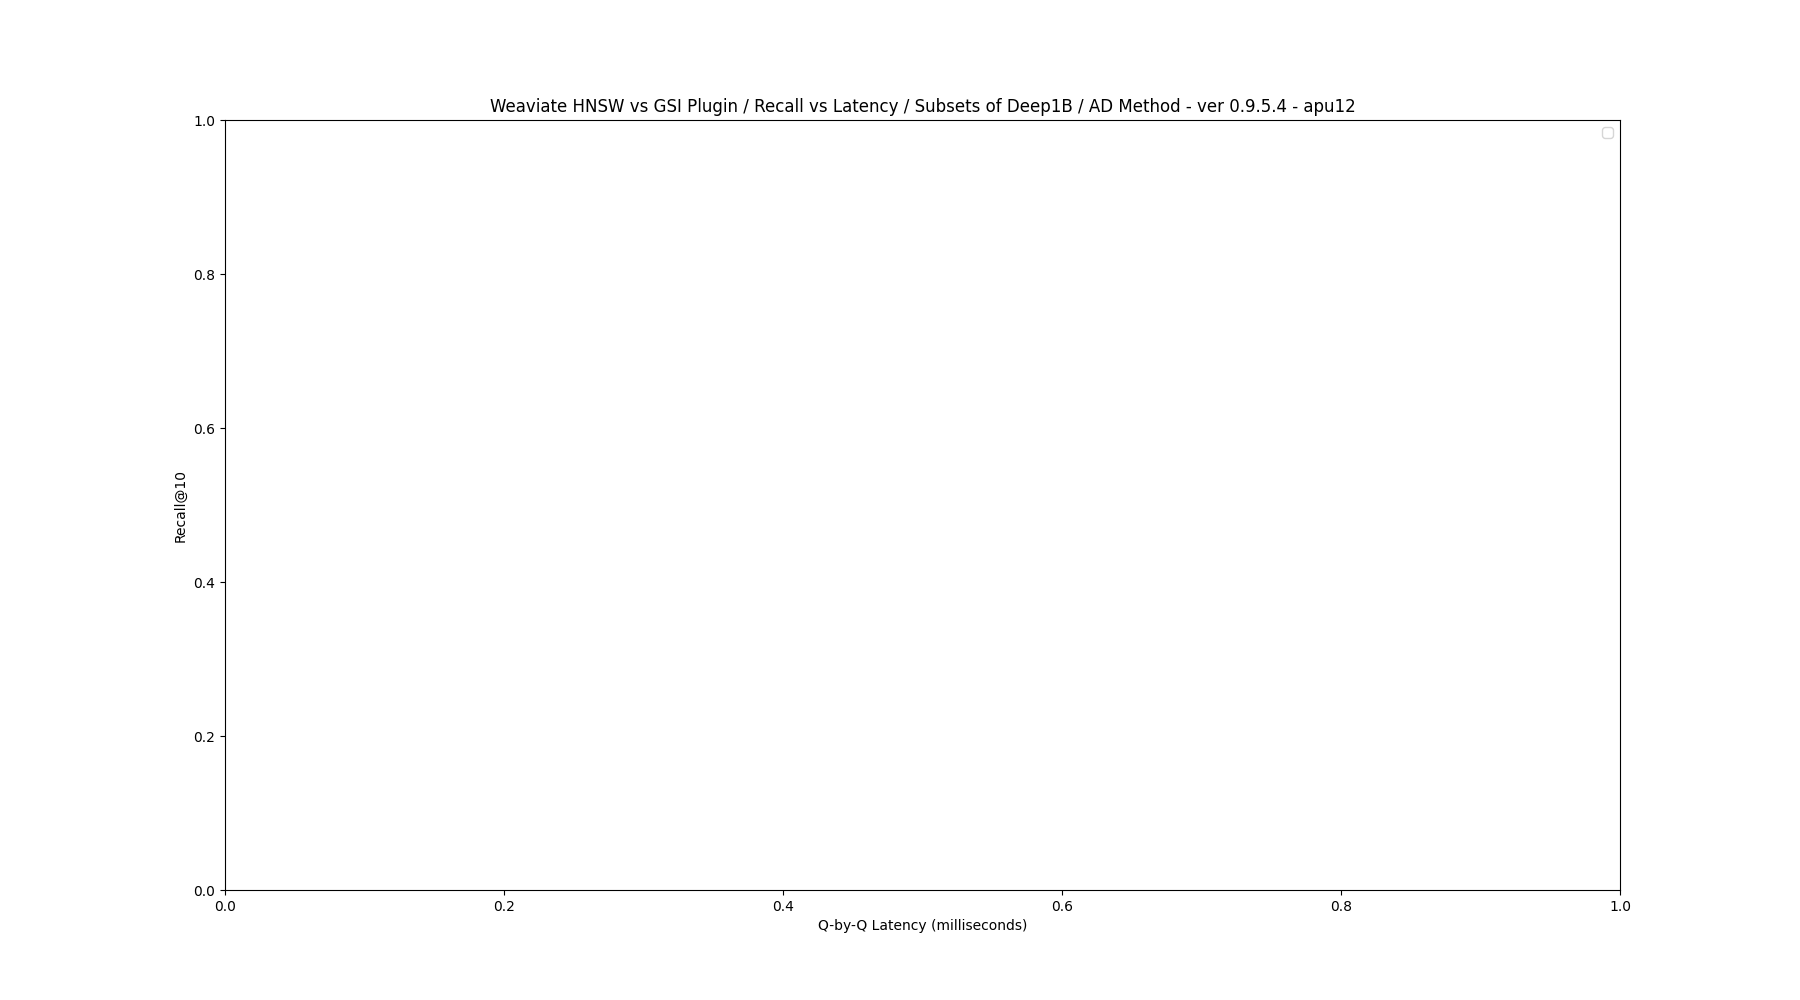

In [55]:
ann_list, lines = [], []
gsi_pareto_list, pareto_list = [], []
def set_graph(a):
    global ann_list
    global lines
    for ef in latest_df.bits.unique():
        tmp = latest_df[latest_df.bits == ef]
        lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, label = str(ef) + ' GSI', alpha=a))
        for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))
        tmp = summary_df[summary_df.ef == ef]
        lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, label = str(ef) + " Weaviate", alpha=a))
        for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))

fig, ax = plt.subplots(figsize=(18,10))
@widgets.interact(a=(0,1,0.1))
def update(a=1.0):
    global ann_list
    global lines
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    [line.pop(0).remove() for line in lines if len(line) > 0]
    lines[:] = []
    set_graph(a)

gsi_pareto_list = []
@widgets.interact(GSI_pareto=False)
def show_gsi_pareto(GSI_pareto):
    global gsi_pareto_list
    if GSI_pareto:
        for size in summary_gsi_df.numrecs.unique():
            if size < 10000000:
                continue
            tmp = summary_gsi_df[summary_gsi_df.numrecs == size]
            gsi_pareto_list.append(plt.plot(tmp.search_mean, tmp.recall10_mean, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in gsi_pareto_list]
        gsi_pareto_list = []

pareto_list = []
@widgets.interact(Weaviate_pareto=False)
def show_weav_pareto(Weaviate_pareto):
    global pareto_list
    if Weaviate_pareto:
        for size in summary_df.numrecs.unique():
            if size < 10000000:
                continue
            tmp = summary_df[summary_df.numrecs == size]
            pareto_list.append(plt.plot(tmp.search_mean, tmp.recall10_mean, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in pareto_list if len(line) > 0]
        pareto_list = []


#mach = df['machine'].iloc[0]
#ver = df_fvs['fvs_version'].iloc[0]

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.set_title("Weaviate HNSW vs GSI Plugin / Recall vs Latency / Subsets of Deep1B / AD Method - ver 0.9.5.4 - apu12")
#ax.set_title("Weaviate HNSW vs GSI Plugin / Recall vs Latency / Subsets of Deep1B / AD Method on Machine {} with FVS: {}".format(mach, ver))
ax.legend()



fig.savefig("results/weaviate_hnsw_apu_0954.png")

## import/load time

<Axes: xlabel='numrecs'>

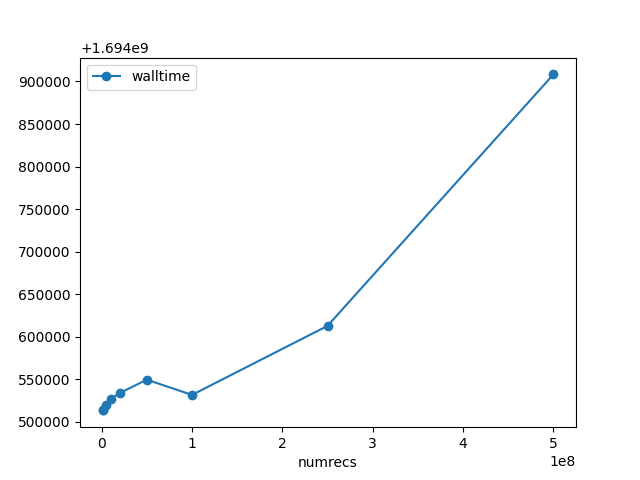

In [62]:
latest_df.groupby( [ 'numrecs' ] ) ['walltime'].mean().to_frame().reset_index().plot(x='numrecs', y='walltime', marker='o')

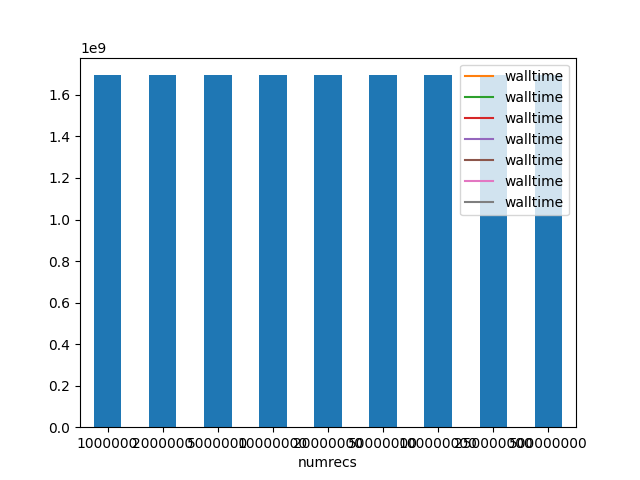

In [48]:
p = latest_df.groupby( [ 'numrecs' ] ) ['walltime'].mean()
p.plot()
plt.show()



In [57]:

# Plot import/train times

# compute average train time via groupby
avg_import_time = \
    summary_df.groupby( [ 'numrecs' ] ) ['import_time'].mean()

# compute average wall import time via groupby
avg_wall_import_time = \
    summary_df.groupby( [ 'numrecs' ] ) ['wall_time'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_import_time.index:
    x = idx
    xs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ys.append(y)
print("hnsw train time", xs,ys)

# get the plot points for wall import time
wxs = []
wys = []
for idx in avg_wall_import_time.index:
    x = idx
    wxs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wys.append(y)
print("hnw wall import time", wxs,wys)

# gsi
avg_import_time = \
    summary_gsi_df.groupby(['numrecs'])['import_time'].mean()
avg_wall_import_time = \
    summary_gsi_df.groupby(['numrecs'])['wall_time'].mean()
xgs = []
ygs = []
for idx in avg_import_time.VCFindex:
    x = idx
    xgs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ygs.append(y)
print("fvs wall import time", xgs,ygs)

wxgs = []
wygs = []
for idx in avg_wall_import_time.index:
    x = idx
    wxgs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wygs.append(y)
print("fvs wall import time", wxgs,wygs)

# latest fvs
avg_import_time = \
    summary_latest_df.groupby(['numrecs'])['import_time'].mean()
avg_wall_import_time = \
    summary_latest_df.groupby(['numrecs'])['wall_time'].mean()
xls = []
yls = []
for idx in avg_import_time.index:
    x = idx
    xls.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    yls.append(y)
print("fvs wall import time", xls, yls)

wxls = []
wyls = []
for idx in avg_wall_import_time.index:
    x = idx
    wxls.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wyls.append(y)
print("fvs wall import time", wxls, wyls)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
#ax.plot(xs,ys, marker='x', label="import time")
ax.plot(wxs,wys, marker='x', label="Weaviate HNSW wall import time")
#ax.plot(xgs,ygs, marker='x', label="gsi import time")
ax.plot(wxgs,wygs, marker='x', label="GSI FVS wall import time")
ax.plot(wxgs,wygs, marker='x', label="Latest FVS wall import time")
ax.set_ylabel('hours')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
#ax.set_xticklabels(['10K','1M', '2M', '5M', '10M', '20M', '50M', '100M', '250M', '500M'], rotation = 45)
ax.set_xticklabels(['', '1M','','','', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
hnsw_hours = "%.1f" % wys[-1]
ax.annotate(hnsw_hours, xy=(wxs[-1],wys[-1]), xytext=(0.0,-30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )
gsi_hours = "%.1f" % wygs[-1]
ax.annotate(gsi_hours, xy=(wxgs[-1],wygs[-1]), xytext=(0.0,30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )
latest_hours = "%.1f" % wygs[-1]
ax.annotate(latest_hours, xy=(wxls[-1],wyls[-1]), xytext=(0.0,30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )

ax.set_title("Weaviate HNSW vs GSI FVS vs Latest FVS (ver 0.9.5.4) Import Time - Subsets of Deep-1B")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/weaviate_hnsw_vs_fvs_wall_import_time_ad_0954.png")

# TODO:  plot the variance at each X

hnsw train time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0003818066666666668, 0.14540470305555553, 0.2352491308333334, 1.001331927222222, 2.179133355833333, 8.664645293055557, 19.848325099722224, 39.44160888972221, 237.5416018741666, 432.4261059541668]
hnw wall import time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.00038237222222222214, 0.1454839922222222, 0.23534187722222216, 1.0016525494444446, 2.17970271, 8.666903835555553, 19.852297736944447, 39.448619405555576, 237.57768246083327, 432.4658226855555]


AttributeError: 'Series' object has no attribute 'VCFindex'